In [1]:
# This is an example meshing script. The intention is to showcase some of the features in CAD_to_OpenMC
# and the parameters that may be used.

import CAD_to_OpenMC.assembly as amb

#When this option is set the mesher backends will use the default options
#regardless of what has been configured otherwise
amb.mesher_config['default']=False

#Iterable of int or None. If set this is a set of surface numbers that will be skipped
#in the meshing step. This is usually only of use for debugging geometry, to find which
#surfaces may have to be redrawn in the CAD-model.
amb.mesher_config['vetoed']=None

#cq/stl-backend, float: Indicates the tolerance in mm for the generated mesh.
amb.mesher_config['tolerance']=0.1

#cq/stl backend, float: Inidicates the angularot tolerance in a mesh (in radians)
amb.mesher_config['angular_tolerance']=0.2

#gmsh backend or cq/stl backend with refinement, float: Indicates the minimum size of mesh elements
# that should be left unrefined.
amb.mesher_config['min_mesh_size']=0.1
#gmsh backend or cq/stl backend with refinement, float: Indicates the maximum size of mesh elements
# that should be left unrefined.
amb.mesher_config['max_mesh_size']=10.0

#gmsh backend, int: Indicates how many points should be sampled on a curve.
amb.mesher_config['curve_samples']=20

#gmsh backend, int: which algorithm should be used for the surface mesh generation by gmsh.
# Possible choices run 1, through 9.
#  1: Automatic, 2: Adaptive, 3: Delaunay, 4: Frontal Delaunay, 5: BAMG, 6: Frontal Delaunay for Quads, 7: Packing of Parallelograms
#  8: Quasi-structured, 9: Initial Mesh Only.
amb.mesher_config['mesh_algorithm']=1

#both backends, int. The number of parallel threads that should be used during the meshing operation. For gmsh as a backend this amounts this is an OpenMC
# style operation, whereas for the cq/stl-backend this amounts to meshing object by object in parallel.
amb.mesher_config['threads']=4

#gmsh backend, float (experimental). Installs an inverse proportion on mesh element sizes. This is intended to circumvent the problem that
# may arise in cylindrical geometries, when objects are similar and close together _and_ have a large radius, such that the surfaces
# meshes may end up overlapping. While it is possible to lower the minimum limit overall, this may not be desirable.
amb.mesher_config['radial_threshold']=0

#gmsh and cq/stl backend, int or boolean. Run a mesh refinement algorithm on the generated meshes. If the gmsh backend is active,
# this is the number of times, the mesh-splitting routine will be run (1 if set to True). If the cq/stl-backend is selected
# the mmg-refinement tools is run once (if set to True or >0)
amb.mesher_config['refine']=0

a=amb.Assembly(['box_cylinder.stp'])

a.import_stp_files()
a.merge_all()
a.solids_to_h5m(backend='stl', h5m_filename='box_cylinder_cubit.h5m')

#these 3 lines be shortend using the utility function run to:
# a.run(backend='stl')

INFO: box_cylinder.stp imported - scaling
Info    :  - Label 'Shapes/1' (3D)
Info    :  - Label 'Shapes/2' (3D)
INFO: reordering volumes after merge
INFO: mesher reusing 1242218005 vol_1_face5.stl
INFO: mesher reusing 1242332741 vol_1_face6.stl
SUMMARY: solid_id material_tag     stl-file        
SUMMARY:        1 1                volume_1.stl    
SUMMARY:        2 2                volume_2.stl    
INFO: checking surfaces and reparing normals
INFO: reassembling stl-files into h5m structure
INFO: writing geometry to h5m: "box_cylinder_cubit.h5m".


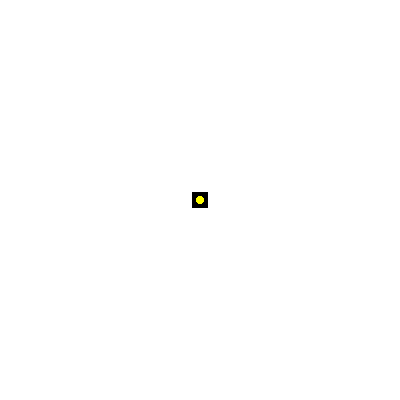

In [4]:
import openmc


from IPython.display import Image
from matplotlib import pyplot as plt
 # materials
u235 = openmc.Material(name="2")
u235.add_nuclide('U235', 1.0, 'ao')
u235.set_density('g/cc', 11)
water = openmc.Material(name="1")
water.add_nuclide('H1', 2.0)
water.add_nuclide('O16', 1.0)
water.set_density('g/cm3', 1.0)
materials = openmc.Materials([u235,water])

dagmc_univ = openmc.DAGMCUniverse(filename='box_cylinder_cubit.h5m', auto_geom_ids=True, auto_mat_ids=True)
bounding_box = openmc.rectangular_prism(20,20,boundary_type='vacuum')

cell = openmc.Cell(region=bounding_box, fill=dagmc_univ)
geometry = openmc.Geometry([cell])

settings = openmc.Settings()
settings.batches = 100
settings.inactive = 2
settings.particles = 10000

model = openmc.Model(geometry=geometry, materials=materials, settings=settings)
model.export_to_model_xml()

p = openmc.Plot()
p.width = (25.0, 25.0)
p.pixels = (400, 400)
p.color_by = 'material'
p.colors = {u235: 'yellow',water:'black'}
openmc.plot_inline(p)



In [5]:
openmc.run()

                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################